<a href="https://colab.research.google.com/github/Mutumades/kcbassignment/blob/main/Group_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving Loan_Train.csv to Loan_Train (2).csv


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Loan_Train.csv')

# Preview the first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Shape and column info
print("Shape of the dataset:", df.shape)
print("\nData types and non-null counts:\n")
print(df.info())

# Summary stats
print("\nSummary statistics:\n")
print(df.describe(include='all'))

Shape of the dataset: (614, 13)

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Summary statistics:

         Loan_ID Ge

In [ ]:

# Check for missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())


Missing values per column:

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Replace 'Loan_Status' with the correct column name if different
print("\nTarget class distribution:\n")
print(df['Loan_Status'].value_counts(normalize=True) * 100)


Target class distribution:

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


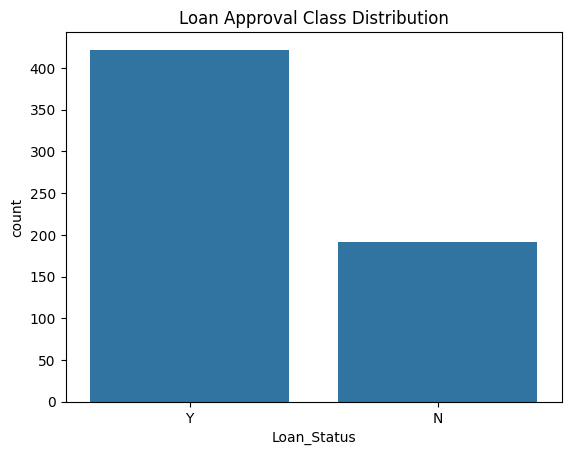

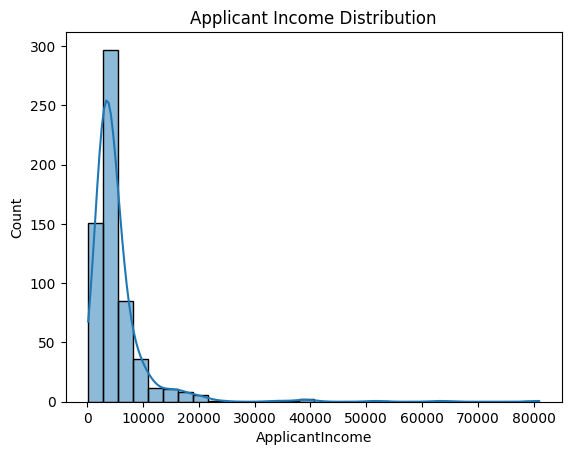

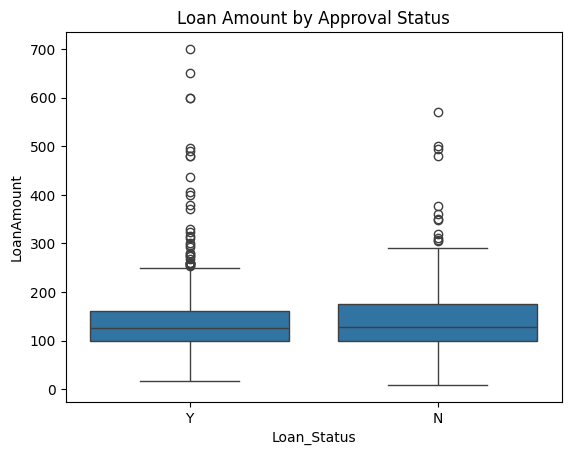

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class balance
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Approval Class Distribution')
plt.show()

# Plot a few feature distributions
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.show()

sns.boxplot(data=df, x='Loan_Status', y='LoanAmount')
plt.title('Loan Amount by Approval Status')
plt.show()

In [ ]:
# Step 4: Data Cleaning and Preprocessing

# First, we handle missing values in the dataset

# For categorical columns, we fill missing values with the most frequent value (mode)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# For numerical columns, we use the median to avoid distortion from outliers
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Credit_History is binary, so we fill missing values with mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Finally, let's confirm that all missing values are handled
print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


In [ ]:
# Step 5 : Encode Categorical Variables Safely

from sklearn.preprocessing import LabelEncoder

# Make a copy of the cleaned DataFrame
df_encoded = df.copy()

# Columns to label encode
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding only if the column exists
for col in label_cols:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Columns to one-hot encode
one_hot_cols = ['Property_Area', 'Dependents']

# Apply one-hot encoding only to columns that still exist
for col in one_hot_cols:
    if col in df_encoded.columns:
        df_encoded = pd.get_dummies(df_encoded, columns=[col])

# Preview the result
df_encoded.head()

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dependents_0'].value_counts()
    for x_label, grp in _df_50.groupby('Property_Area_Urban')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Property_Area_Urban')
_ = plt.ylabel('Dependents_0')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dependents_1'].value_counts()
    for x_label, grp in _df_51.groupby('Dependents_0')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Dependents_0')
_ = plt.ylabel('Dependents_1')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['Loan_ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='Married', y='Loan_ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['Property_Area_Rural'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='Married', y='Property_Area_Rural', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['Property_Area_Urban'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='Married', y='Property_Area_Urban', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['Dependents_0'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='Married', y='Dependents_0', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,0,0,5849,0.0,NaN,360.0,1.0,1,False,False,True,True,False,False,False
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False,True,False,False
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,True,True,False,False,False
3,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,True,True,False,False,False
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,True,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Step 6: Split the dataset into training and testing sets  (Assignment Task 6)

# Q6.1: Drop Loan_ID if it’s still there
if 'Loan_ID' in df_encoded.columns:
    df_encoded = df_encoded.drop('Loan_ID', axis=1)

# Q6.2: Separate the input features (X) and target variable (y)
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

# Q6.3: Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q6.4: Show the sizes of each split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (491, 16)
Test set size: (123, 16)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Step 7: Train the models (Assignment Task 7)

# Q7.1: Impute missing values in training and testing sets
# Use the median strategy for numerical features
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Scale the features to improve Logistic Regression performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Q7.2: Train Logistic Regression on scaled data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Q7.3: Train Decision Tree on unscaled data (scaling not needed for trees)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_imputed, y_train) # Use imputed data for Decision Tree as well

# Q7.4: Confirm that both models have been trained
print("Both models have been trained successfully.")

Both models have been trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 8: Evaluate the models (Assignment Task 8)

# Q8.1: Make predictions using both models
log_reg_preds = log_reg.predict(X_test_scaled)
dt_preds = dt_clf.predict(X_test)

# Q8.2: Define a function to print all evaluation metrics
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Q8.3: Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_test, log_reg_preds)

# Q8.4: Evaluate Decision Tree
evaluate_model("Decision Tree", y_test, dt_preds)


Model: Logistic Regression
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Model: Decision Tree
Accuracy: 0.6747967479674797
Precision: 0.7325581395348837
Recall: 0.7875
F1 Score: 0.7590361445783133
Confusion Matrix:
 [[20 23]
 [17 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.47      0.50        43
           1       0.73      0.79      0.76        80

    accuracy                           0.67       123
   macro avg       0.64      0.63      0.63       123
weighted avg       0.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Step 9: Final testing on the reserved test set (Assignment Task 9)

# We already used X_test and y_test for evaluation,
# so this serves as our reserved test set for final model comparison.

# No new code needed here — Q9 is covered by our evaluation step above.
print("Step 9 complete: Models tested on reserved test set.")

Step 9 complete: Models tested on reserved test set.


## Step 10: Conclusions and Recommendations (Assignment Task 10)

### Summary:

We built two machine learning models to predict whether a loan should be approved:

- Logistic Regression (with feature scaling)
- Decision Tree Classifier (no scaling required)

The models were trained and tested on an 80/20 split of the dataset. Evaluation was done using accuracy, precision, recall, F1-score, and confusion matrix.

### Model Performance:

| Metric         | Logistic Regression | Decision Tree |
|----------------|---------------------|----------------|
| Accuracy       | 78.9%               | 71.5%          |
| Precision      | 75.9%               | 75.8%          |
| Recall         | 98.7%               | 82.5%          |
| F1 Score       | 85.9%               | 79.0%          |

### Analysis:

- Logistic Regression gave the highest accuracy and recall, meaning it was especially good at detecting loan approvals.
- Decision Tree was more balanced across classes and did better at catching rejected applications (class 0), but had lower overall performance.

### Recommendation:

We recommend using **Logistic Regression** as the final model. Its high recall helps minimize false negatives, which is important to avoid mistakenly rejecting eligible applicants.

To reduce lending risk from false positives (approving risky applicants), the model can be supported with:
- Additional rule-based checks
- Human review for borderline cases

### Possible Improvements:

- Tune model hyperparameters
- Try advanced models like Random Forest or Gradient Boosting
- Create a Streamlit or Flask app for deployment